# SUYASH PRATAP SINGH

# 181B226

1. Download the csv file for time series data about Covid-19 cases in India.
2. Pre-process the data to check about any missing data.
3. Plot the time series to visualise it.
4. Identify the trend, seasonality and remainder parts of the time series.
5. Identify the SARIMAX parameters
6. Forecast the time series for next 100 days.
7. Plot your forecasted data along with the original data.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("case_time_series.csv")

In [3]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


In [4]:
df['Date'] = pd.to_datetime(df['Date']+'-20', format='%d-%b-%y')
df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
88,2020-04-27,1568,29458,580,7103,58,939
89,2020-04-28,1902,31360,636,7739,69,1008
90,2020-04-29,1705,33065,690,8429,71,1079
91,2020-04-30,1801,34866,630,9059,75,1154


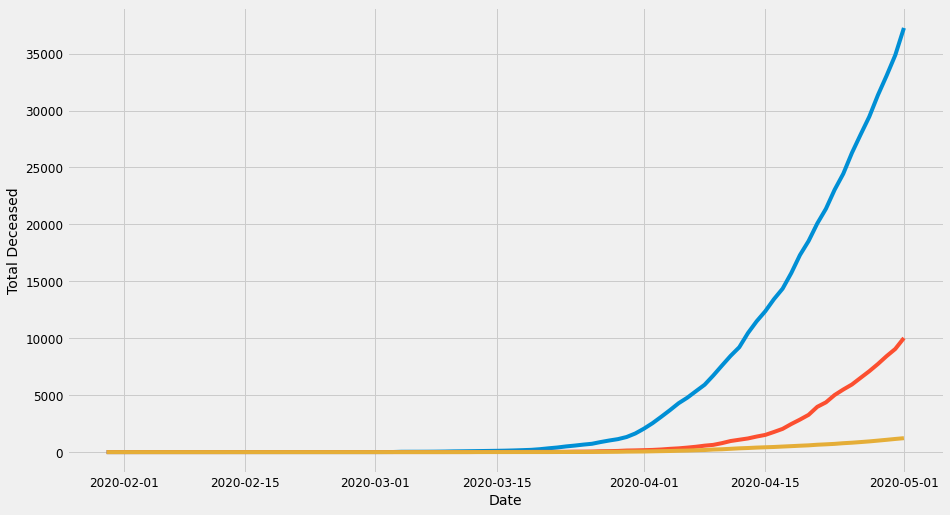

In [5]:
fig,ax = plt.subplots(1,1,figsize=(14,8))
sns.lineplot(x="Date", y="Total Confirmed", data=df)
sns.lineplot(x="Date", y="Total Recovered", data=df)
sns.lineplot(x="Date", y="Total Deceased", data=df)
plt.show()

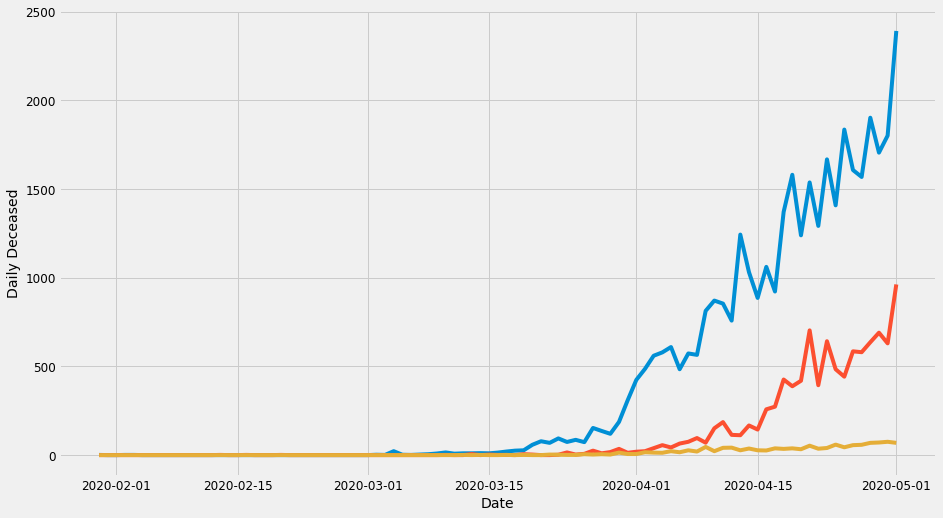

In [6]:
fig,ax = plt.subplots(1,1,figsize=(14,8))
sns.lineplot(x="Date", y="Daily Confirmed", data=df)
sns.lineplot(x="Date", y="Daily Recovered", data=df)
sns.lineplot(x="Date", y="Daily Deceased", data=df)
plt.show()

In [7]:
df['Date'].min(), df['Date'].max()

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-05-01 00:00:00'))

In [8]:
df.isnull().sum()

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [9]:
df.columns

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [10]:
df= df.sort_values('Date')
df.isnull().sum()

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [11]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0


In [12]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92],
           dtype='int64')

In [13]:
len(df)

93

In [14]:
df = df.groupby('Date')['Daily Confirmed'].sum().reset_index()


In [15]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [16]:
y = df['Daily Confirmed'].resample('D').mean()

In [17]:
y.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [18]:
y.fillna(method='ffill',inplace=True)
y['2020':]

Date
2020-01-30       1
2020-01-31       0
2020-02-01       0
2020-02-02       1
2020-02-03       1
              ... 
2020-04-27    1568
2020-04-28    1902
2020-04-29    1705
2020-04-30    1801
2020-05-01    2391
Freq: D, Name: Daily Confirmed, Length: 93, dtype: int64

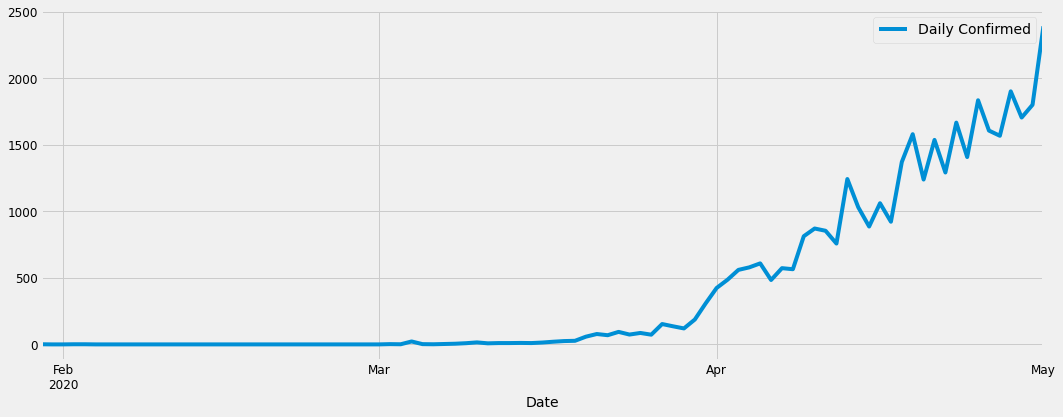

In [19]:
df.plot(figsize=(16, 6))
plt.show()

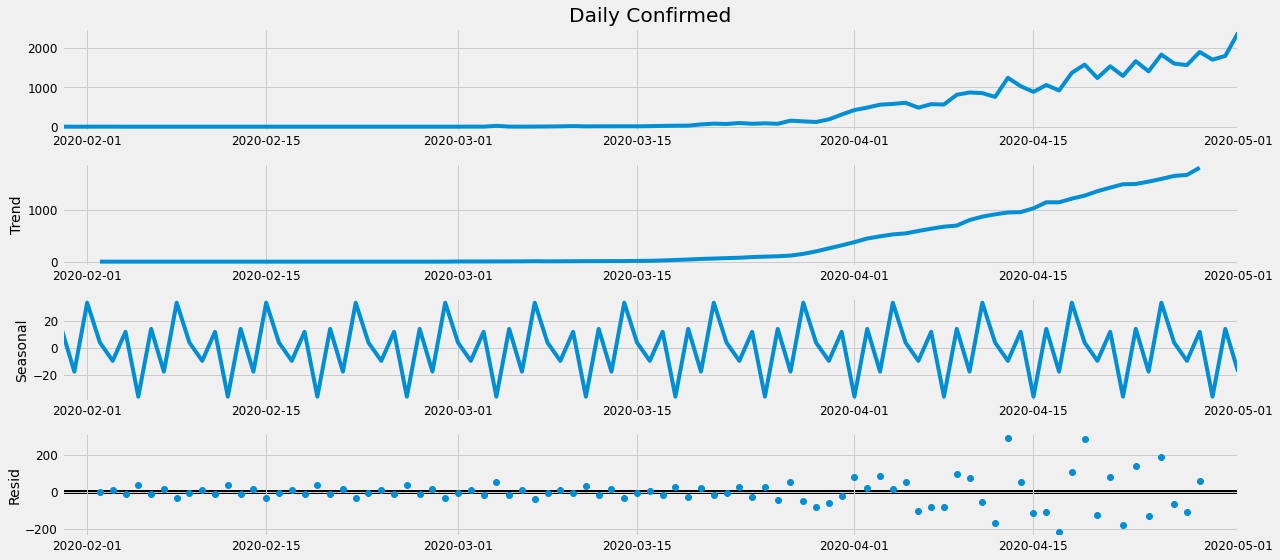

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, freq = 7, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:1476.601540333891
ARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:1245.0143185698457
ARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:1184.1519913098896
ARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:980.2230815313703
ARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:1113.4772324587777
ARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:1100.1469071034285
ARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:957.6377730326396
ARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:946.2527671528005
ARIMA(0, 0, 1)x(0, 0, 0, 12)7 - AIC:1374.8256828570577
ARIMA(0, 0, 1)x(0, 0, 1, 12)7 - AIC:1161.7335496262308
ARIMA(0, 0, 1)x(0, 1, 0, 12)7 - AIC:1106.3149518250207
ARIMA(0, 0, 1)x(0, 1, 1, 12)7 - AIC:929.9201708331321
ARIMA(0, 0, 1)x(1, 0, 0, 12)7 - AIC:1073.4264461411308
ARIMA(0, 0, 1)x(1, 0, 1, 12)7 - AIC:1050.8585034196767
ARIMA(0, 0, 1)x(1, 1, 0, 12)7 - AIC:934.4951461403318
ARIMA(0, 0, 1)x(1, 1, 1, 12)7 - AIC:907.7896989422792
ARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1168.4252661848107
ARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1015.7069147763119
ARIMA(0, 1, 0)x(0

In [23]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:836.3002715447209

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

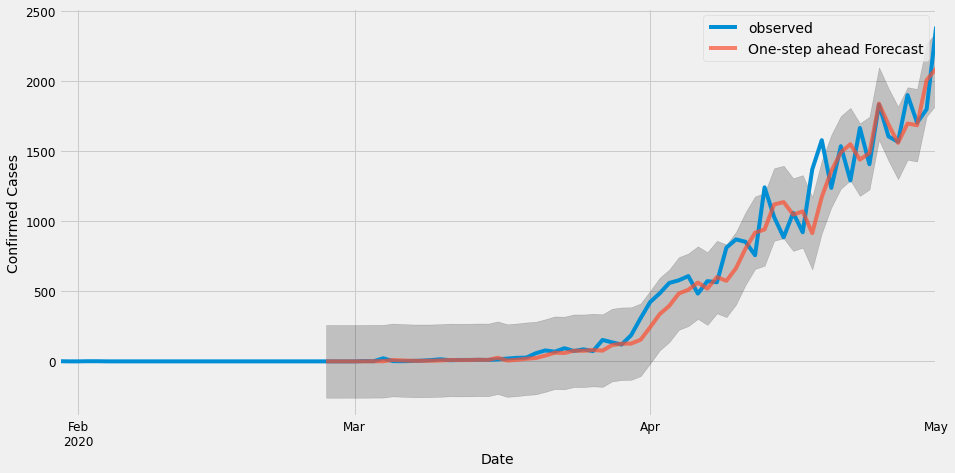

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2020-02-27'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

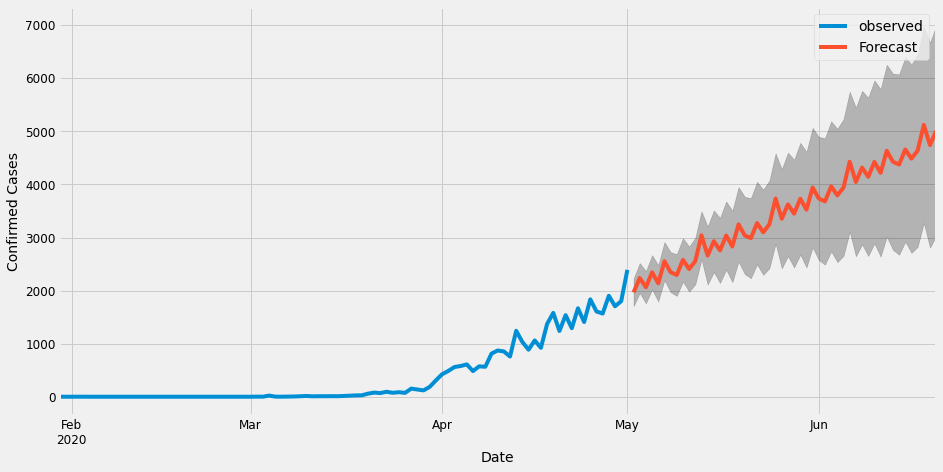

In [26]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

# THANK YOU